### Regime Switching Models to Identify Market Instability: Empirical Evidence from the S&P 500 Index

#### Code to download S&P 500 data using pandas_datareader and yfinance

[*********************100%***********************]  1 of 1 completed


Price             Close Log_Returns
Ticker            ^GSPC            
Date                               
2000-01-04  1399.420044   -0.039099
2000-01-05  1402.109985    0.001920
2000-01-06  1403.449951    0.000955
2000-01-07  1441.469971    0.026730
2000-01-10  1457.599976    0.011128


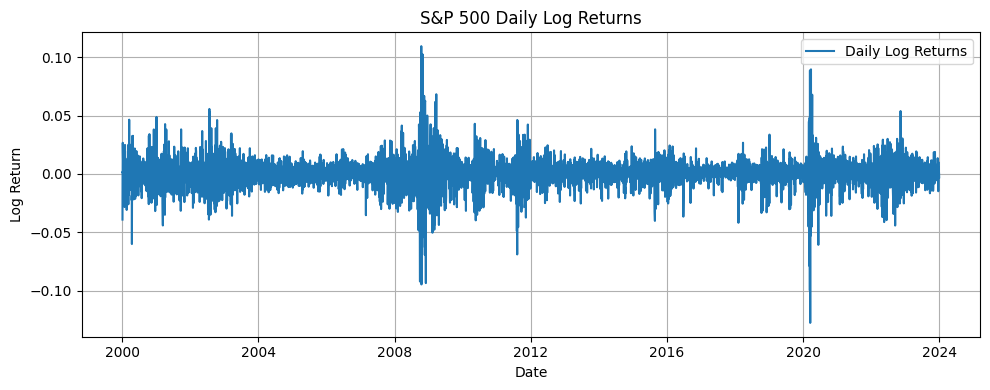

In [65]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Download S&P 500 data
sp500_data = yf.download('^GSPC', start='2000-01-01', end='2023-12-31')

# Step 2: Ensure datetime index
sp500_data.index = pd.to_datetime(sp500_data.index)
sp500_data = sp500_data.asfreq('B')  # 'B' means Business Day frequency

# Step 3: Compute daily log returns
sp500_data['Log_Returns'] = np.log(sp500_data['Close'] / sp500_data['Close'].shift(1))

# Step 4: Drop missing values
sp500_data.dropna(inplace=True)

# Step 5: Display the first few rows to verify
print(sp500_data[['Close', 'Log_Returns']].head())

# Optional: Plot log returns
plt.figure(figsize=(10, 4))
plt.plot(sp500_data['Log_Returns'], label='Daily Log Returns')
plt.title('S&P 500 Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### Summary Statistics

In [66]:
print("Summary Statistics of Log Returns:")
print(sp500_data['Log_Returns'].describe())

Summary Statistics of Log Returns:
count    5818.000000
mean        0.000206
std         0.012366
min        -0.127652
25%        -0.004891
50%         0.000615
75%         0.005918
max         0.109572
Name: Log_Returns, dtype: float64


#### Descriptive statistics for the daily log returns 

In [84]:
# Descriptive Statistics for Log Returns
mean_return = sp500_data['Log_Returns'].mean()
median_return = sp500_data['Log_Returns'].median()
std_return = sp500_data['Log_Returns'].std()
skewness = sp500_data['Log_Returns'].skew()
kurtosis = sp500_data['Log_Returns'].kurtosis()

# Print the statistics in a clear table
print("Descriptive Statistics for S&P 500 Daily Log Returns (2000–2023):")
print(f"{'Statistic':<20}{'Value'}")
print(f"{'-'*35}")
print(f"{'Mean':<20}{mean_return:.6f}")
print(f"{'Median':<20}{median_return:.6f}")
print(f"{'Standard Deviation':<20}{std_return:.6f}")
print(f"{'Skewness':<20}{skewness:.6f}")
print(f"{'Kurtosis':<20}{kurtosis:.6f}")

Descriptive Statistics for S&P 500 Daily Log Returns (2000–2023):
Statistic           Value
-----------------------------------
Mean                0.000206
Median              0.000615
Standard Deviation  0.012366
Skewness            -0.374242
Kurtosis            10.548721


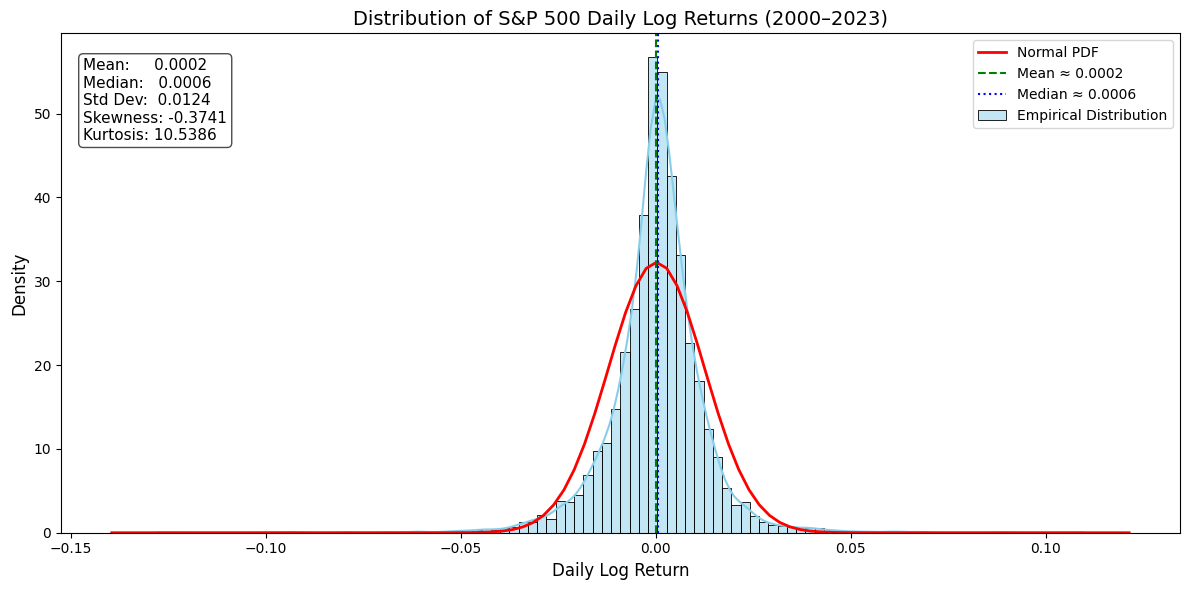

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

# Extract log returns
log_returns = sp500_data['Log_Returns'].dropna()

# Compute stats
mean_val = log_returns.mean()
median_val = log_returns.median()
std_val = log_returns.std()
skew_val = skew(log_returns)
kurt_val = kurtosis(log_returns)

# Plot distribution
plt.figure(figsize=(12, 6))
sns.histplot(log_returns, bins=100, kde=True, stat='density', color='skyblue', label='Empirical Distribution')

# Overlay Normal distribution curve for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_val, std_val)
plt.plot(x, p, 'r', linewidth=2, label='Normal PDF')

# Annotate statistics
plt.axvline(mean_val, color='green', linestyle='--', linewidth=1.5, label=f'Mean ≈ {mean_val:.4f}')
plt.axvline(median_val, color='blue', linestyle=':', linewidth=1.5, label=f'Median ≈ {median_val:.4f}')

# Titles and labels
plt.title('Distribution of S&P 500 Daily Log Returns (2000–2023)', fontsize=14)
plt.xlabel('Daily Log Return', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add a stats box
textstr = '\n'.join((
    f'Mean:     {mean_val:.4f}',
    f'Median:   {median_val:.4f}',
    f'Std Dev:  {std_val:.4f}',
    f'Skewness: {skew_val:.4f}',
    f'Kurtosis: {kurt_val:.4f}'))
plt.gca().text(0.02, 0.95, textstr, transform=plt.gca().transAxes,
               fontsize=11, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.legend()
plt.tight_layout()
plt.show()


#### Line Plot of Adjusted Closing Price

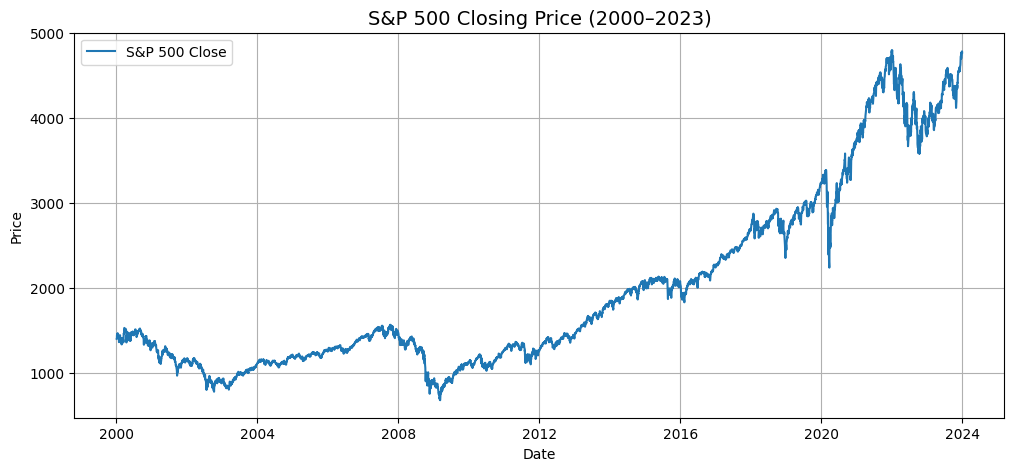

In [67]:
plt.figure(figsize=(12, 5))
plt.plot(sp500_data['Close'], label='S&P 500 Close')
plt.title('S&P 500 Closing Price (2000–2023)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

#### Line Plot of Daily Log Returns

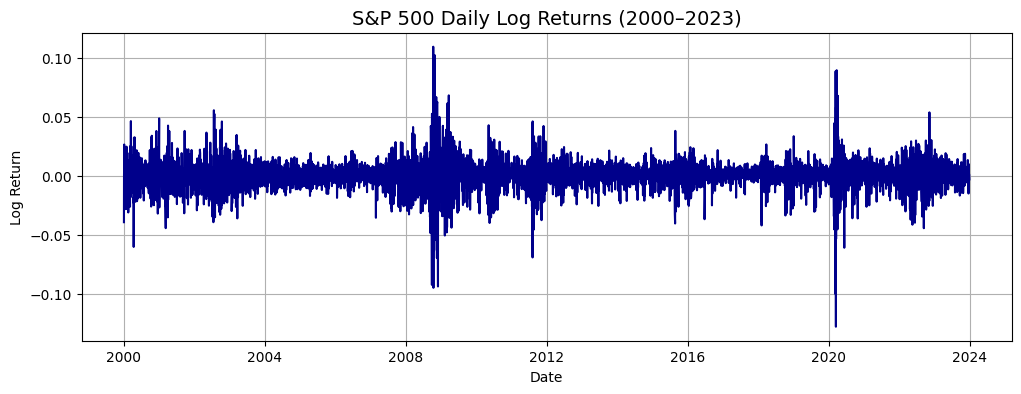

In [68]:
plt.figure(figsize=(12, 4))
plt.plot(sp500_data['Log_Returns'], color='darkblue')
plt.title('S&P 500 Daily Log Returns (2000–2023)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

#### Histogram of Log Returns

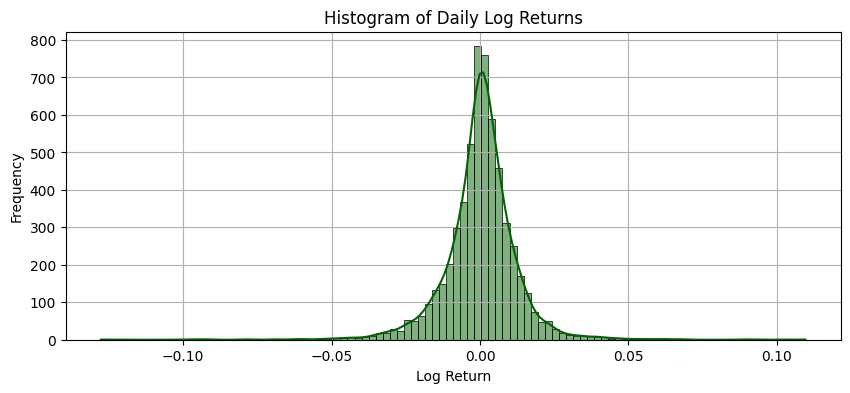

In [69]:
plt.figure(figsize=(10, 4))
sns.histplot(sp500_data['Log_Returns'], kde=True, bins=100, color='darkgreen')
plt.title('Histogram of Daily Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Boxplot to Detect Outliers

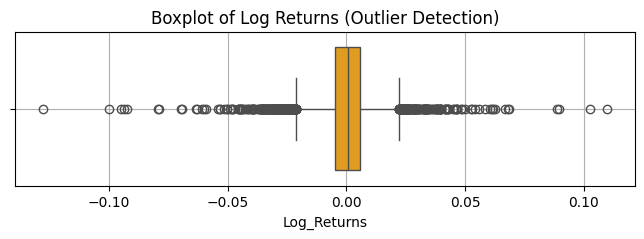

In [70]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=sp500_data['Log_Returns'], color='orange')
plt.title('Boxplot of Log Returns (Outlier Detection)')
plt.grid(True)
plt.show()

#### Rolling Volatility (30-day standard deviation)

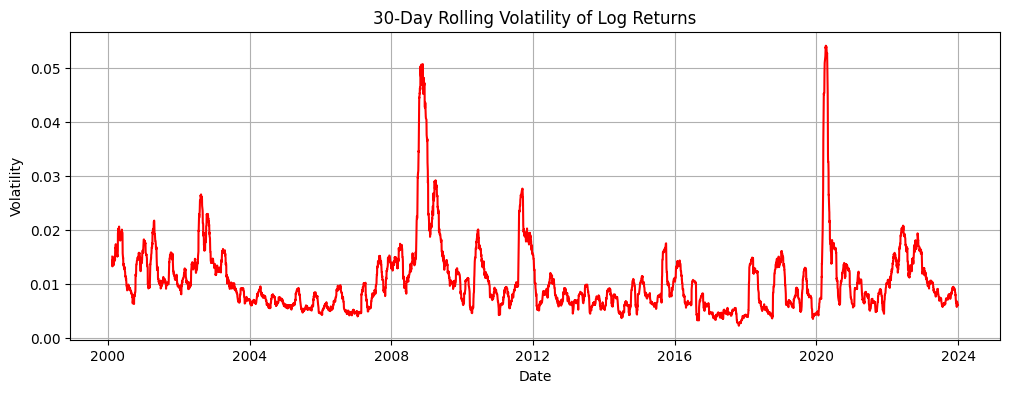

In [71]:
plt.figure(figsize=(12, 4))
sp500_data['Rolling_Volatility'] = sp500_data['Log_Returns'].rolling(window=30).std()
plt.plot(sp500_data['Rolling_Volatility'], color='red')
plt.title('30-Day Rolling Volatility of Log Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

#### Correlation with Lagged Returns (Autocorrelation)

<Figure size 1000x400 with 0 Axes>

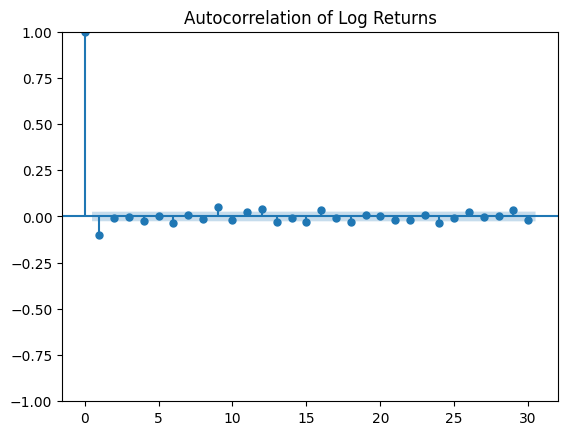

In [72]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 4))
plot_acf(sp500_data['Log_Returns'], lags=30)
plt.title('Autocorrelation of Log Returns')
plt.show()

### Markov Switching Model on S&P 500 Log Returns

In [73]:
import statsmodels.api as sm
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Define the model: Markov Switching with 2 regimes and only intercepts (no exogenous variables)
model = MarkovRegression(
    sp500_data['Log_Returns'],
    k_regimes=2,
    trend='c',       # constant/intercept for each regime
    switching_variance=True
)

# Fit the model
result = model.fit()

# Print summary of the results
print(result.summary())


C:\Users\user\anaconda3\envs\tfenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:            Log_Returns   No. Observations:                 5818
Model:               MarkovRegression   Log Likelihood               18514.981
Date:                Fri, 18 Jul 2025   AIC                         -37017.962
Time:                        16:39:53   BIC                         -36977.950
Sample:                             0   HQIC                        -37004.045
                               - 5818                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      6.584      0.000       0.001       0.001
sigma2       4.83e-05   1.79e-06     26.992      0.0

#### Plot the Regimes Over Time

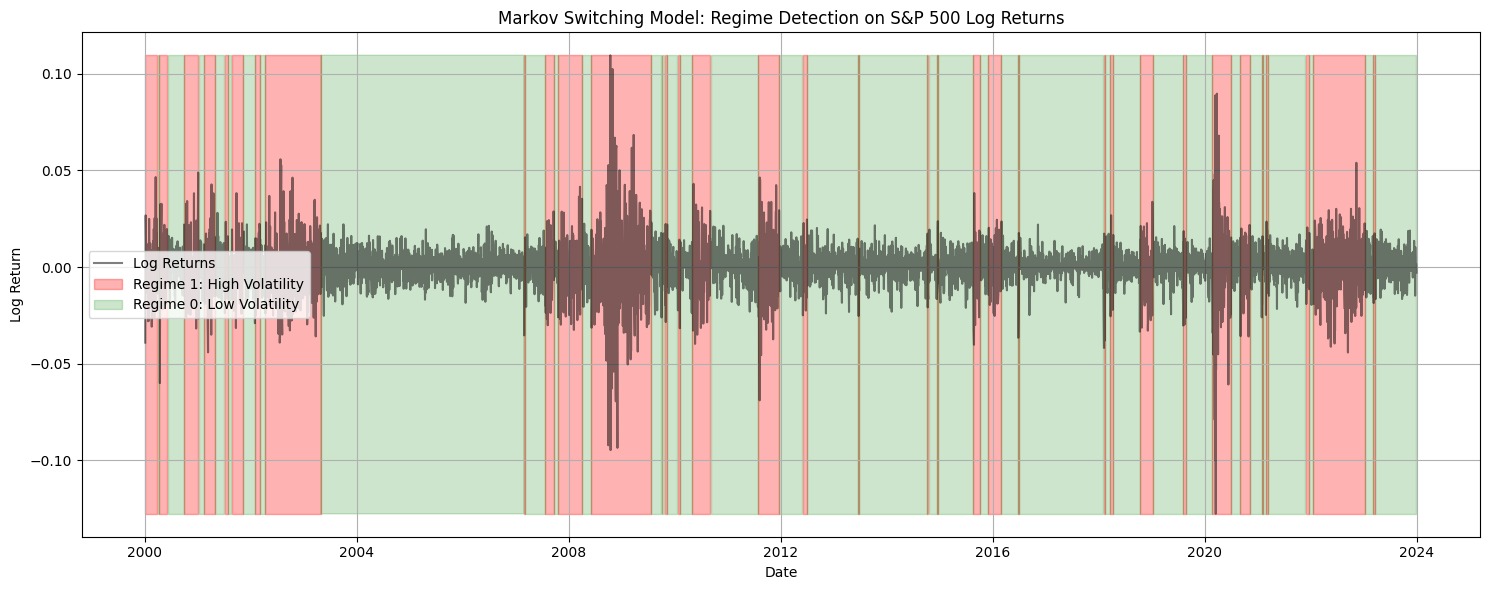

In [75]:
# Add the smoothed regime probabilities to the DataFrame
sp500_data['Regime_Prob_0'] = results.smoothed_marginal_probabilities[0]
sp500_data['Regime_Prob_1'] = results.smoothed_marginal_probabilities[1]

# Plot regimes overlayed on log returns
plt.figure(figsize=(15, 6))
plt.plot(sp500_data.index, sp500_data['Log_Returns'], label='Log Returns', color='black', alpha=0.5)

# Shade high-volatility regime (regime 1)
plt.fill_between(sp500_data.index,
                 sp500_data['Log_Returns'].min(),
                 sp500_data['Log_Returns'].max(),
                 where=sp500_data['Regime_Prob_1'] > 0.5,
                 color='red', alpha=0.3, label='Regime 1: High Volatility')

# Shade low-volatility regime (regime 0)
plt.fill_between(sp500_data.index,
                 sp500_data['Log_Returns'].min(),
                 sp500_data['Log_Returns'].max(),
                 where=sp500_data['Regime_Prob_0'] > 0.5,
                 color='green', alpha=0.2, label='Regime 0: Low Volatility')

plt.title('Markov Switching Model: Regime Detection on S&P 500 Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


####  Plot Regime Probabilities

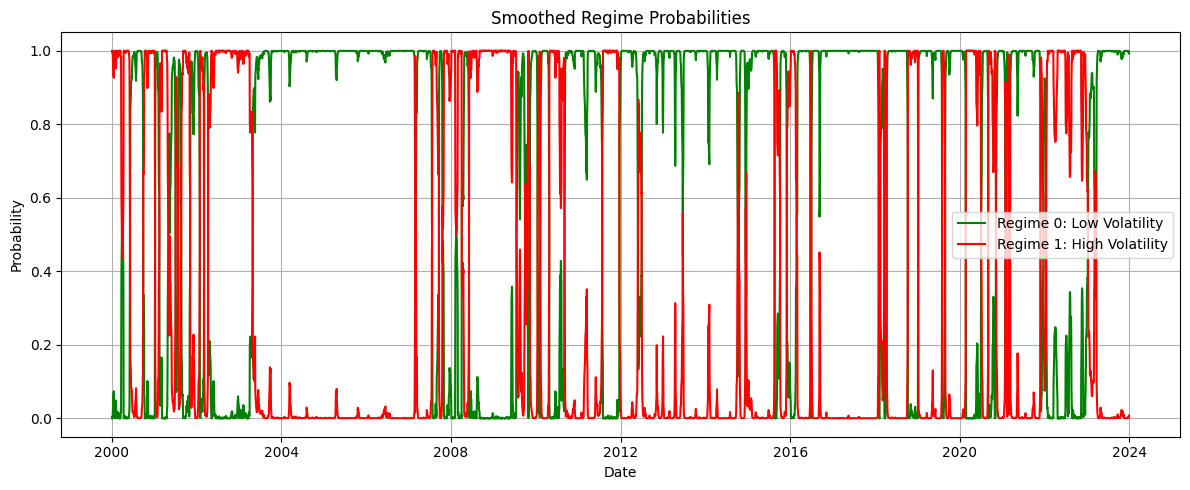

In [76]:
plt.figure(figsize=(12, 5))
plt.plot(sp500_data['Regime_Prob_0'], label='Regime 0: Low Volatility', color='green')
plt.plot(sp500_data['Regime_Prob_1'], label='Regime 1: High Volatility', color='red')
plt.title('Smoothed Regime Probabilities')
plt.xlabel('Date')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Extract Regime-specific Parameters

In [78]:
print("Means of regimes:", results.params.iloc[[0, 2]])
print("Variances of regimes:", results.params.iloc[[1, 3]]**2)


Means of regimes: p[0->0]     0.988717
const[0]    0.000765
dtype: float64
Variances of regimes: p[1->0]     0.000591
const[1]    0.000001
dtype: float64


#### Interpretation of Results

#### Visualize Regime Probabilities Over Time

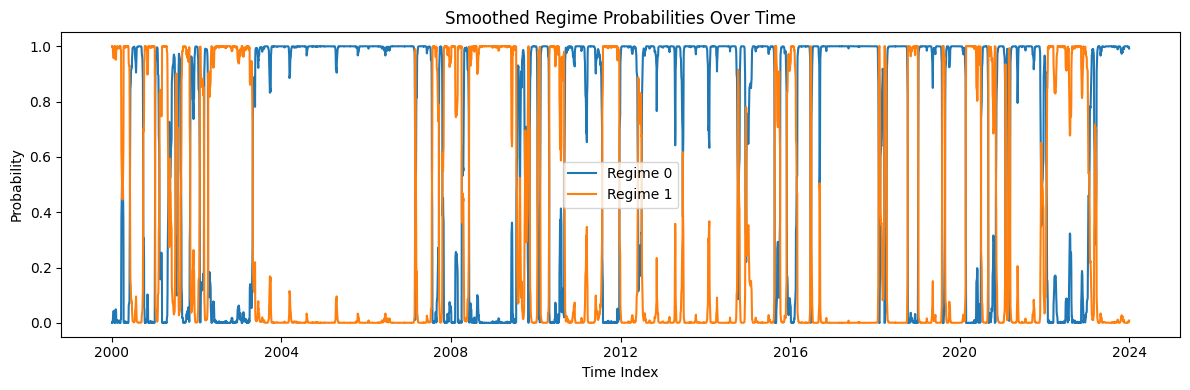

In [80]:
# Plot smoothed probabilities of being in Regime 0
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(results.smoothed_marginal_probabilities[0], label='Regime 0')
ax.plot(results.smoothed_marginal_probabilities[1], label='Regime 1')
ax.set_title('Smoothed Regime Probabilities Over Time')
ax.set_ylabel('Probability')
ax.set_xlabel('Time Index')
ax.legend()
plt.tight_layout()
plt.show()

In [81]:
p00 = 0.9884
p11 = 0.9755

duration_regime_0 = 1 / (1 - p00)
duration_regime_1 = 1 / (1 - p11)

print(f"Expected duration in Regime 0: {duration_regime_0:.2f} time periods")
print(f"Expected duration in Regime 1: {duration_regime_1:.2f} time periods")


Expected duration in Regime 0: 86.21 time periods
Expected duration in Regime 1: 40.82 time periods


#### Code to Plot Log Returns with Regime Probabilities Overlay

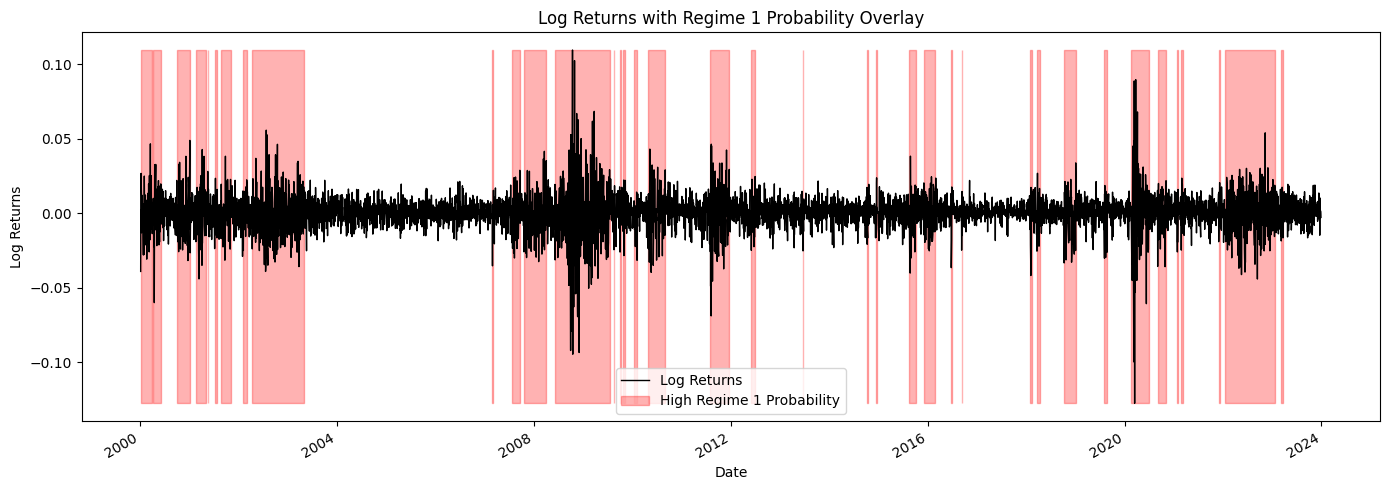

In [83]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assume df['Log_Returns'] is your return series
# And results.smoothed_marginal_probabilities[1] is the probability of being in Regime 1

fig, ax = plt.subplots(figsize=(14, 5))

# Plot Log Returns
sp500_data['Log_Returns'].plot(ax=ax, color='black', lw=1, label='Log Returns')

# Overlay shaded area where regime 1 probability is high (>0.5)
prob_regime_1 = results.smoothed_marginal_probabilities[1]
high_prob = prob_regime_1 > 0.5

# Use fill_between for highlighting regime
ax.fill_between(sp500_data.index, sp500_data['Log_Returns'].min(), sp500_data['Log_Returns'].max(),
                where=high_prob,
                color='red', alpha=0.3, label='High Regime 1 Probability')

# Labels and formatting
ax.set_title('Log Returns with Regime 1 Probability Overlay')
ax.set_ylabel('Log Returns')
ax.set_xlabel('Date')
ax.legend()
plt.tight_layout()
plt.show()
